In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NaN

In [2]:
df_raw = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df_raw.head()

/Users/new/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data cleaning

In [3]:
df_raw.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df_raw.shape

(194673, 38)

In [ ]:
df_raw['SPEEDING'].values

In [5]:
df_raw['INCDATE'] = pd.to_datetime(df_raw['INCDATE'])
df_raw['dayofweek'] = df_raw['INCDATE'].dt.dayofweek
df_raw['weekend'] = df_raw['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_raw[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','JUNCTIONTYPE','dayofweek','weekend']]
df_raw['WEATHER'].value_counts()
print(df_raw['SEVERITYCODE'].value_counts())
missing_data = df_raw[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','JUNCTIONTYPE','dayofweek','weekend','COLLISIONTYPE','VEHCOUNT']].isnull()
missing_data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

SPEEDING
True     185340
False      9333
Name: SPEEDING, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

dayofweek
False    194673
Name: dayofweek, dtype: int64

weekend
False    194673
Name: weekend, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64



In [6]:
df_raw['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [7]:
#'SPEEDING'seems having large amount of missing data so the entire independent variable will be dropped 
# All the missing values for the selected features were dropped
df = df_raw[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','dayofweek','weekend']]
df.dropna(inplace = True)
df['WEATHER'].value_counts()
missing_data = df.isnull()
missing_data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
print(df['SEVERITYCODE'].value_counts())
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())
print(df['JUNCTIONTYPE'].value_counts())
print(df['COLLISIONTYPE'].value_counts())
print(df['VEHCOUNT'].value_counts())
print(df['dayofweek'].value_counts())

SEVERITYCODE
False    183177
Name: SEVERITYCODE, dtype: int64

WEATHER
False    183177
Name: WEATHER, dtype: int64

ROADCOND
False    183177
Name: ROADCOND, dtype: int64

LIGHTCOND
False    183177
Name: LIGHTCOND, dtype: int64

JUNCTIONTYPE
False    183177
Name: JUNCTIONTYPE, dtype: int64

COLLISIONTYPE
False    183177
Name: COLLISIONTYPE, dtype: int64

VEHCOUNT
False    183177
Name: VEHCOUNT, dtype: int64

dayofweek
False    183177
Name: dayofweek, dtype: int64

weekend
False    183177
Name: weekend, dtype: int64

1    126521
2     56656
Name: SEVERITYCODE, dtype: int64
Clear                       109157
Raining                      32671
Overcast                     27202
Unknown                      11767
Snowing                        882
Other                          749
Fog/Smog/Smoke                 558
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry      

/Users/new/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
#drop all the 'unknown' values in the selected features
df.drop(df.loc[df['WEATHER']=='Unknown'].index, inplace = True)
df.drop(df.loc[df['ROADCOND']=='Unknown'].index, inplace = True)
df.drop(df.loc[df['LIGHTCOND']=='Unknown'].index, inplace = True)
df.drop(df.loc[df['JUNCTIONTYPE']=='Unknown'].index, inplace = True)

/Users/new/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
#check if all 'unknown' rows have been removed
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())
print(df['JUNCTIONTYPE'].value_counts())

Clear                       107310
Raining                      32309
Overcast                     26566
Snowing                        818
Fog/Smog/Smoke                 544
Other                          250
Sleet/Hail/Freezing Rain       110
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               119892
Wet                45843
Ice                 1080
Snow/Slush           836
Standing Water       105
Other                105
Sand/Mud/Dirt         61
Oil                   58
Name: ROADCOND, dtype: int64
Daylight                    111241
Dark - Street Lights On      46142
Dusk                          5574
Dawn                          2382
Dark - No Street Lights       1357
Dark - Street Lights Off      1090
Other                          185
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64
Mid-Block (not related to intersection)              75321
At Intersection (interse

In [10]:
df

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,dayofweek,weekend
0,2,Overcast,Wet,Daylight,At Intersection (intersection related),Angles,2,2,0
1,1,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),Sideswipe,2,2,0
2,1,Overcast,Dry,Daylight,Mid-Block (not related to intersection),Parked Car,3,3,0
3,1,Clear,Dry,Daylight,Mid-Block (not related to intersection),Other,3,4,1
4,2,Raining,Wet,Daylight,At Intersection (intersection related),Angles,2,2,0
...,...,...,...,...,...,...,...,...,...
194668,2,Clear,Dry,Daylight,Mid-Block (not related to intersection),Head On,2,0,0
194669,1,Raining,Wet,Daylight,Mid-Block (not related to intersection),Rear Ended,2,1,0
194670,2,Clear,Dry,Daylight,At Intersection (intersection related),Left Turn,2,5,1
194671,2,Clear,Dry,Dusk,At Intersection (intersection related),Cycles,1,1,0


In [11]:
#Reset index
df.reset_index(drop = True, inplace = True)
df

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,dayofweek,weekend
0,2,Overcast,Wet,Daylight,At Intersection (intersection related),Angles,2,2,0
1,1,Raining,Wet,Dark - Street Lights On,Mid-Block (not related to intersection),Sideswipe,2,2,0
2,1,Overcast,Dry,Daylight,Mid-Block (not related to intersection),Parked Car,3,3,0
3,1,Clear,Dry,Daylight,Mid-Block (not related to intersection),Other,3,4,1
4,2,Raining,Wet,Daylight,At Intersection (intersection related),Angles,2,2,0
...,...,...,...,...,...,...,...,...,...
167975,2,Clear,Dry,Daylight,Mid-Block (not related to intersection),Head On,2,0,0
167976,1,Raining,Wet,Daylight,Mid-Block (not related to intersection),Rear Ended,2,1,0
167977,2,Clear,Dry,Daylight,At Intersection (intersection related),Left Turn,2,5,1
167978,2,Clear,Dry,Dusk,At Intersection (intersection related),Cycles,1,1,0


## Data visualization

                     WEATHER  SEVERITYCODE  count
0          Blowing Sand/Dirt             1     30
1          Blowing Sand/Dirt             2     13
2                      Clear             1  71896
3                      Clear             2  35414
4             Fog/Smog/Smoke             1    361
5             Fog/Smog/Smoke             2    183
6                      Other             1    172
7                      Other             2     78
8                   Overcast             1  17981
9                   Overcast             2   8585
10             Partly Cloudy             1      2
11             Partly Cloudy             2      3
12                   Raining             1  21280
13                   Raining             2  11029
14          Severe Crosswind             1     18
15          Severe Crosswind             2      7
16  Sleet/Hail/Freezing Rain             1     83
17  Sleet/Hail/Freezing Rain             2     27
18                   Snowing             1    654


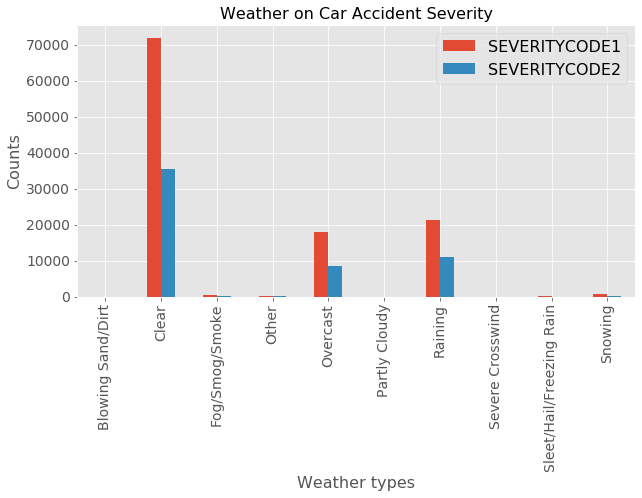

In [12]:
##Data visualization---Weather & SEVERITY CODE
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])
df_Wea = df[['SEVERITYCODE','WEATHER']]
df_Wea

df_Wea2 = pd.DataFrame({'count' : df_Wea.groupby(['WEATHER','SEVERITYCODE']).size()}).reset_index()
print(df_Wea2)
df_wea3=df_Wea2[df_Wea2.index%2==0].reset_index()
df_wea4=df_Wea2[df_Wea2.index%2==1].reset_index()
df_wea3
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_wea3['count'].values.tolist(),
    "SEVERITYCODE2":df_wea4['count'].values.tolist()
    }, 
    index= df_wea3['WEATHER']
)
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Weather on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Weather types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

plt.show()


          ROADCOND  SEVERITYCODE  count
0              Dry             1  80409
1              Dry             2  39483
2              Ice             1    818
3              Ice             2    262
4              Oil             1     34
5              Oil             2     24
6            Other             1     63
7            Other             2     42
8    Sand/Mud/Dirt             1     40
9    Sand/Mud/Dirt             2     21
10      Snow/Slush             1    680
11      Snow/Slush             2    156
12  Standing Water             1     75
13  Standing Water             2     30
14             Wet             1  30358
15             Wet             2  15485


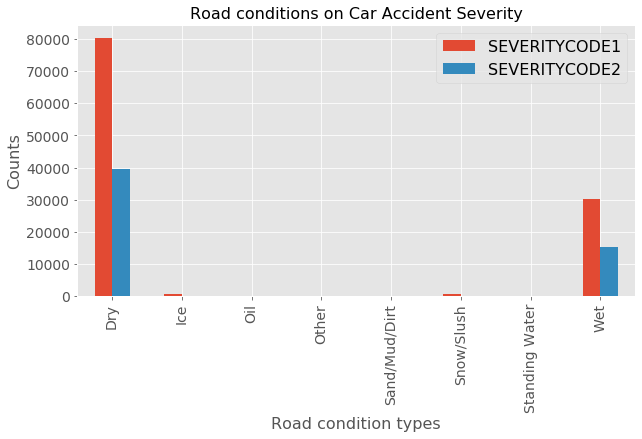

In [13]:
# Data visualization:ROADCOND & SEVERITY
df_Road = df[['SEVERITYCODE','ROADCOND']]
df_Road
df_Road2 = pd.DataFrame({'count' : df_Road.groupby(['ROADCOND','SEVERITYCODE']).size()}).reset_index()
print(df_Road2)
df_Road3=df_Road2[df_Road2.index%2==0].reset_index()
df_Road4=df_Road2[df_Road2.index%2==1].reset_index()
df_Road3
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_Road3['count'].values.tolist(),
    "SEVERITYCODE2":df_Road4['count'].values.tolist()
    }, 
    index= df_Road3['ROADCOND']
)
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Road conditions on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Road condition types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

                   LIGHTCOND  SEVERITYCODE  count
0    Dark - No Street Lights             1   1038
1    Dark - No Street Lights             2    319
2   Dark - Street Lights Off             1    783
3   Dark - Street Lights Off             2    307
4    Dark - Street Lights On             1  31935
5    Dark - Street Lights On             2  14207
6    Dark - Unknown Lighting             1      5
7    Dark - Unknown Lighting             2      4
8                       Dawn             1   1577
9                       Dawn             2    805
10                  Daylight             1  73320
11                  Daylight             2  37921
12                      Dusk             1   3683
13                      Dusk             2   1891
14                     Other             1    136
15                     Other             2     49


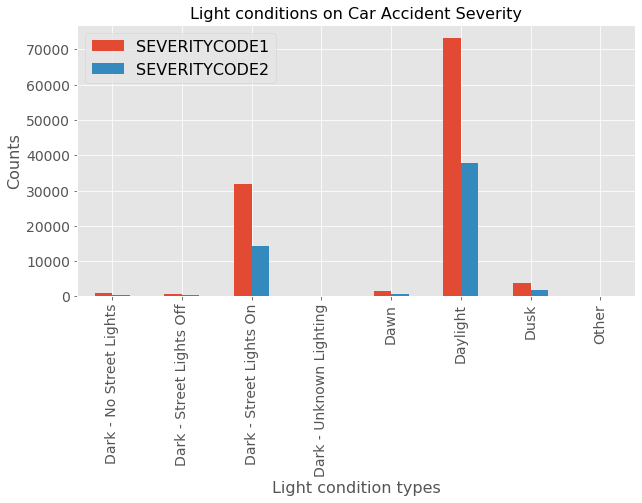

In [14]:
# Data visualization:ROADCOND & SEVERITY
df_Light = df[['SEVERITYCODE','LIGHTCOND']]
df_Light
df_Light2 = pd.DataFrame({'count' : df_Light.groupby(['LIGHTCOND','SEVERITYCODE']).size()}).reset_index()
print(df_Light2)
df_Light3=df_Light2[df_Light2.index%2==0].reset_index()
df_Light4=df_Light2[df_Light2.index%2==1].reset_index()
df_Light3
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_Light3['count'].values.tolist(),
    "SEVERITYCODE2":df_Light4['count'].values.tolist()
    }, 
    index= df_Light3['LIGHTCOND']
)
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Light conditions on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Light condition types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

                                         JUNCTIONTYPE  SEVERITYCODE  count
0   At Intersection (but not related to intersection)             1   1197
1   At Intersection (but not related to intersection)             2    601
2              At Intersection (intersection related)             1  33275
3              At Intersection (intersection related)             2  26233
4                                   Driveway Junction             1   6848
5                                   Driveway Junction             2   3133
6                Mid-Block (but intersection related)             1  14229
7                Mid-Block (but intersection related)             2   6986
8             Mid-Block (not related to intersection)             1  56823
9             Mid-Block (not related to intersection)             2  18498
10                                      Ramp Junction             1    105
11                                      Ramp Junction             2     52


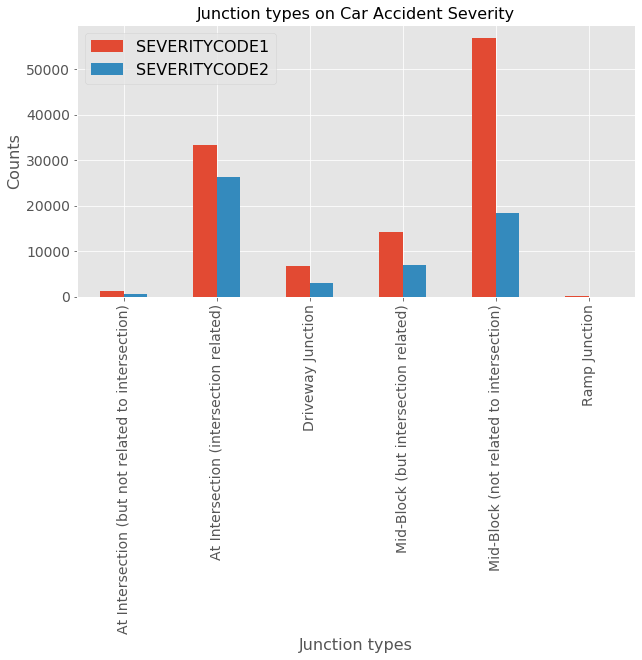

In [15]:
# Data visualization:Junction Type & SEVERITY
df_Junction = df[['SEVERITYCODE','JUNCTIONTYPE']]
df_Junction
df_Junction2 = pd.DataFrame({'count' : df_Junction.groupby(['JUNCTIONTYPE','SEVERITYCODE']).size()}).reset_index()
print(df_Junction2)
df_Junction3=df_Junction2[df_Junction2.index%2==0].reset_index()
df_Junction4=df_Junction2[df_Junction2.index%2==1].reset_index()
df_Junction3
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_Junction3['count'].values.tolist(),
    "SEVERITYCODE2":df_Junction4['count'].values.tolist()
    }, 
    index= df_Junction3['JUNCTIONTYPE']
)
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Junction types on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Junction types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

   COLLISIONTYPE  SEVERITYCODE  count
0         Angles             1  20348
1         Angles             2  13394
2         Cycles             1    608
3         Cycles             2   4594
4        Head On             1   1090
5        Head On             2    857
6      Left Turn             1   8013
7      Left Turn             2   5344
8          Other             1  16193
9          Other             2   5900
10    Parked Car             1  30007
11    Parked Car             2   2582
12    Pedestrian             1    630
13    Pedestrian             2   5644
14    Rear Ended             1  18305
15    Rear Ended             2  14184
16    Right Turn             1   2209
17    Right Turn             2    594
18     Sideswipe             1  15074
19     Sideswipe             2   2410


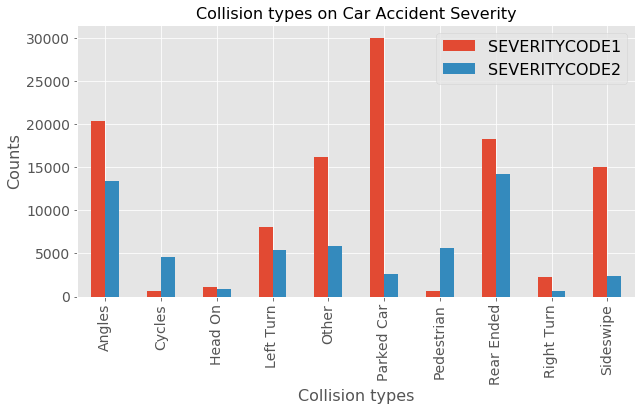

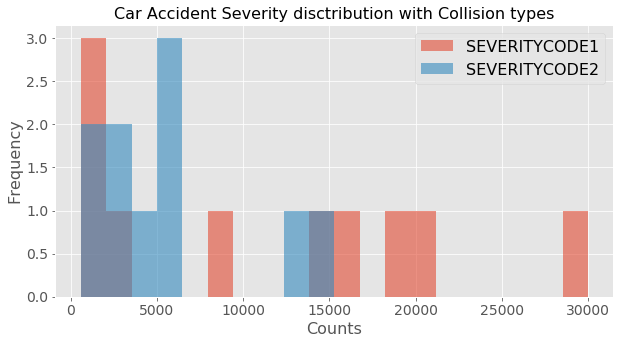

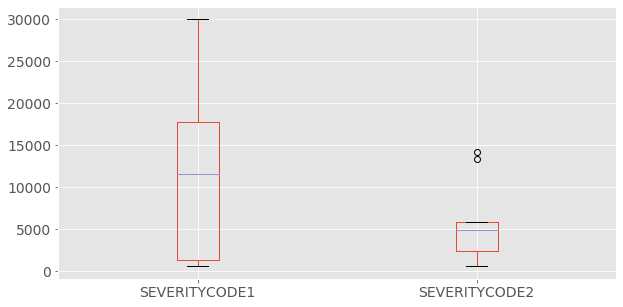

In [16]:
# Data visualization:Collision type & SEVERITY
df_Collision = df[['SEVERITYCODE','COLLISIONTYPE']]
df_Collision
df_Collision2 = pd.DataFrame({'count' : df_Collision.groupby(['COLLISIONTYPE','SEVERITYCODE']).size()}).reset_index()
print(df_Collision2)
df_Collision3=df_Collision2[df_Collision2.index%2==0].reset_index()
df_Collision4=df_Collision2[df_Collision2.index%2==1].reset_index()
df_Collision3
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_Collision3['count'].values.tolist(),
    "SEVERITYCODE2":df_Collision4['count'].values.tolist()
    }, 
    index= df_Collision3['COLLISIONTYPE']
)
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Collision types on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Collision types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)
plotdata.plot(kind="hist", figsize=(10,5),bins = 20, fontsize = 14, alpha = 0.6, stacked = False)
plt.title("Car Accident Severity disctribution with Collision types",fontdict = {'fontsize' : 16})
plt.xlabel("Counts",fontdict = {'fontsize' : 16})
plt.ylabel("Frequency",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

plotdata.plot(kind = 'box', figsize = (10,5), fontsize = 14)

   COLLISIONTYPE  SEVERITYCODE  count
0         Angles             1  20348
1         Angles             2  13394
2         Cycles             1    608
3         Cycles             2   4594
4        Head On             1   1090
5        Head On             2    857
6      Left Turn             1   8013
7      Left Turn             2   5344
8          Other             1  16193
9          Other             2   5900
10    Parked Car             1  30007
11    Parked Car             2   2582
12    Pedestrian             1    630
13    Pedestrian             2   5644
14    Rear Ended             1  18305
15    Rear Ended             2  14184
16    Right Turn             1   2209
17    Right Turn             2    594
18     Sideswipe             1  15074
19     Sideswipe             2   2410


(-1.1055936750627395,
 1.100266365479178,
 -1.103524435225009,
 1.1035669367121859)

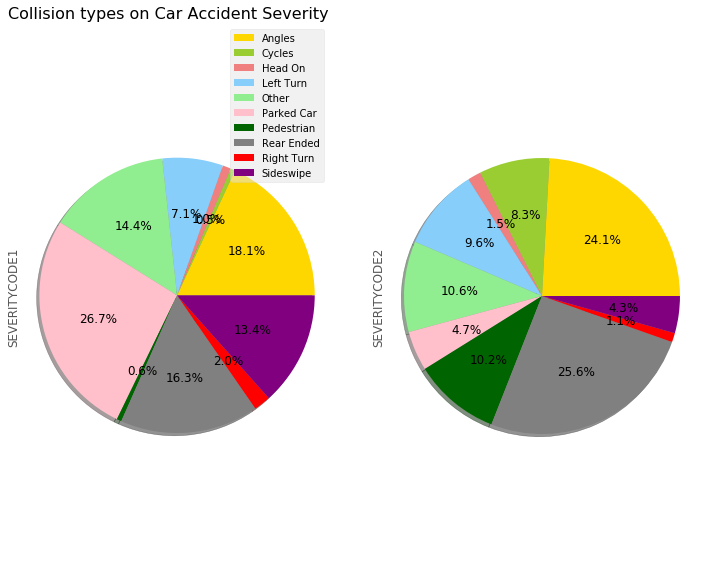

In [17]:
# Data visualization:Collision type & SEVERITY
df_Collision = df[['SEVERITYCODE','COLLISIONTYPE']]
df_Collision
df_Collision2 = pd.DataFrame({'count' : df_Collision.groupby(['COLLISIONTYPE','SEVERITYCODE']).size()}).reset_index()
print(df_Collision2)
df_Collision3=df_Collision2[df_Collision2.index%2==0].reset_index()
df_Collision4=df_Collision2[df_Collision2.index%2==1].reset_index()

plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_Collision3['count'].values.tolist(),
    "SEVERITYCODE2":df_Collision4['count'].values.tolist()
    }, 
    index= df_Collision3['COLLISIONTYPE']
)
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','darkgreen', 'grey', 'red', 'purple']
plotdata['SEVERITYCODE1'].plot(kind="pie", figsize=(12,10),autopct='%1.1f%%',colors = color_list, shadow = True, labels = None, fontsize = 12, ax = ax0)
ax0.set_title("Collision types on Car Accident Severity",loc='right', fontdict = {'fontsize' : 16})
ax0.legend(labels=plotdata['SEVERITYCODE1'].index, loc='upper right', framealpha =0.5, fontsize = 10)
ax0.axis('equal')

plotdata['SEVERITYCODE2'].plot(kind="pie", figsize=(12,10),autopct='%1.1f%%',colors = color_list, shadow = True, labels = None, fontsize = 12, ax = ax1)
#ax1.set_title("Collision types on Car Accident Severity2",fontdict = {'fontsize' : 16})
#ax1.legend(labels=plotdata['SEVERITYCODE2'].index, loc='upper left', fontsize = 12)
ax1.axis('equal')

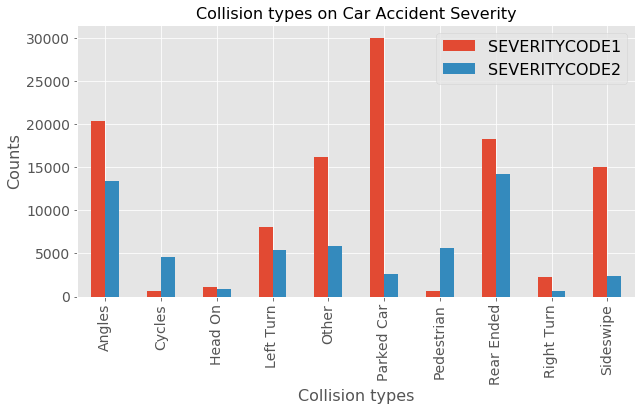

In [18]:
plotdata.plot(kind="bar", figsize=(10,5),fontsize = 14)
plt.title("Collision types on Car Accident Severity",fontdict = {'fontsize' : 16})
plt.xlabel("Collision types",fontdict = {'fontsize' : 16})
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

In [19]:
# Data visualization:Vehcount & SEVERITY
import seaborn as sns
df_vehcount = df[['SEVERITYCODE','VEHCOUNT']]
df_vehcount

,SEVERITYCODE,VEHCOUNT
0,2,2
1,1,2
2,1,3
3,1,3
4,2,2
...,...,...
167975,2,2
167976,1,2
167977,2,2
167978,2,1


In [20]:
df_vehcount2 = pd.DataFrame({'count' : df_vehcount.groupby(['VEHCOUNT','SEVERITYCODE']).size()}).reset_index()
print(df_vehcount2)
df_vehcount2.loc[-1] = [10,1,0]
df_vehcount2.loc[-2] = [12,2,0]
df_vehcount2.index = df_vehcount2.index + 2  # shifting index
df_vehcount2 = df_vehcount2.sort_index()
df_vehcount2.sort_values(by = ['VEHCOUNT','SEVERITYCODE'], ascending = True, inplace = True)
df_vehcount2=df_vehcount2.reset_index(drop = True)
df_vehcount2

    VEHCOUNT  SEVERITYCODE  count
0          0             1      3
1          0             2    187
2          1             1  10633
3          1             2  13528
4          2             1  93038
5          2             2  34979
6          3             1   7134
7          3             2   5387
8          4             1   1289
9          4             2   1066
10         5             1    258
11         5             2    259
12         6             1     82
13         6             2     59
14         7             1     23
15         7             2     22
16         8             1     10
17         8             2      5
18         9             1      3
19         9             2      6
20        10             2      2
21        11             1      3
22        11             2      3
23        12             1      1


,VEHCOUNT,SEVERITYCODE,count
0,0,1,3
1,0,2,187
2,1,1,10633
3,1,2,13528
4,2,1,93038
5,2,2,34979
6,3,1,7134
7,3,2,5387
8,4,1,1289
9,4,2,1066


In [21]:
df_vehcount3=df_vehcount2[df_vehcount2.index%2==0].reset_index(drop = True)
df_vehcount4=df_vehcount2[df_vehcount2.index%2==1].reset_index(drop = True)
df_vehcount3
df_vehcount3['SEVERITYCODE2'] = df_vehcount4['count']
df_vehcount3
df_vehcount3.rename(columns={'count': 'SEVERITYCODE1'}, inplace = True)
df_vehcount3.drop(columns = ['SEVERITYCODE'],inplace = True)
#df_vehcount3.set_index('VEHCOUNT', inplace = True)
df_vehcount3.drop(columns = ['VEHCOUNT'],inplace = True)
df_vehcount3

,SEVERITYCODE1,SEVERITYCODE2
0,3,187
1,10633,13528
2,93038,34979
3,7134,5387
4,1289,1066
5,258,259
6,82,59
7,23,22
8,10,5
9,3,6


In [22]:
plotdata = pd.DataFrame({
    "SEVERITYCODE1":df_vehcount3['SEVERITYCODE1'].values.tolist(),
    "SEVERITYCODE2":df_vehcount3['SEVERITYCODE2'].values.tolist()
    }, 
    index= df_vehcount3.index
    )

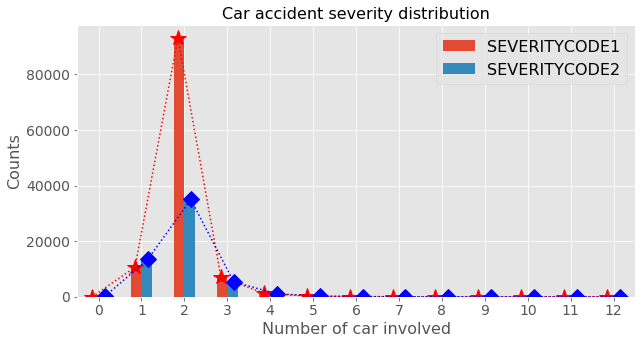

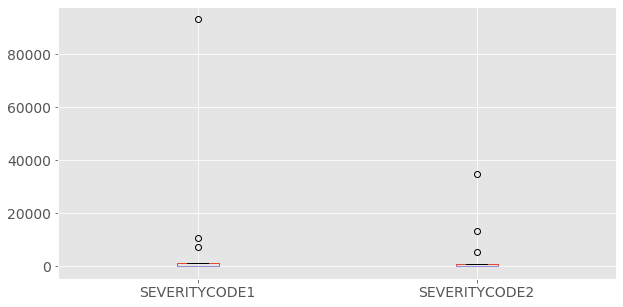

In [23]:
import matplotlib as mpl
mpl.style.use(['ggplot'])
from numpy import asarray as ar
df_vehcount3.plot(kind="bar", figsize=(10,5), fontsize = 14)
plt.title("Car accident severity distribution",fontdict = {'fontsize' : 16})
plt.xlabel("Number of car involved",fontdict = {'fontsize' : 16})
plt.xticks(rotation = 0)
plt.ylabel("Counts",fontdict = {'fontsize' : 16})
plt.legend(fontsize = 16)

x = ar(range(13))
y1 = ar(df_vehcount3['SEVERITYCODE1'].values)
y2 = ar(df_vehcount3['SEVERITYCODE2'].values)
plt.plot(x-0.15,y1,'or:',label='data', marker = '*', markersize = '16')
plt.plot(x+0.15,y2,'b+:',label='data', marker = 'D', markersize = '12')
#plt.plot(x,gaus(x,*popt),'ro:',label='fit')
#result = gmodel.fit(y, params, x=x, amp=5, cen=5, wid=1)(f)
#print(p)
#PlotPolly(p, x, y1, 'Number of Cars')
df_vehcount3.plot(kind = 'box', figsize = (10,5),fontsize = 14)

In [24]:
# Data visualization:dayofweek & SEVERITY
df_dayofweek = df[['SEVERITYCODE','dayofweek']]
df_dayofweek
df_dayofweek2 = pd.DataFrame({'count' : df_dayofweek.groupby(['dayofweek','SEVERITYCODE']).size()}).reset_index()
print(df_dayofweek2)
df_dayofweek3=df_dayofweek2[df_dayofweek2.index%2==0].reset_index()
df_dayofweek4=df_dayofweek2[df_dayofweek2.index%2==1].reset_index()
df_dayofweek3
df_dayofweek3['SEVERITYCODE2'] = df_dayofweek4['count']
df_dayofweek3
df_dayofweek3.rename(columns={'count': 'SEVERITYCODE1'}, inplace = True)
df_dayofweek3.drop(columns = ['SEVERITYCODE'],inplace = True)
df_dayofweek3.drop(columns = ['index'], inplace = True)
#df_dayofweek3 = df_dayofweek3.set_index('dayofweek', drop = True)
df_dayofweek3

    dayofweek  SEVERITYCODE  count
0           0             1  14939
1           0             2   7603
2           1             1  16339
3           1             2   8296
4           2             1  16556
5           2             2   8333
6           3             1  16731
7           3             2   8643
8           4             1  18846
9           4             2   9124
10          5             1  16042
11          5             2   7695
12          6             1  13024
13          6             2   5809


,dayofweek,SEVERITYCODE1,SEVERITYCODE2
0,0,14939,7603
1,1,16339,8296
2,2,16556,8333
3,3,16731,8643
4,4,18846,9124
5,5,16042,7695
6,6,13024,5809


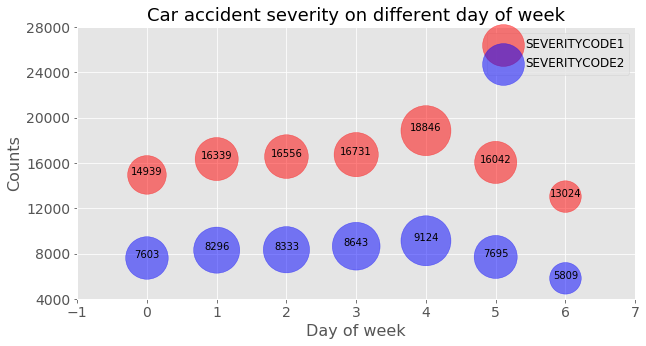

In [25]:
#plotdata = pd.DataFrame({
   # "SEVERITYCODE1":df_dayofweek3['SEVERITYCODE1'].values.tolist(),
  #  "SEVERITYCODE2":df_dayofweek3['SEVERITYCODE2'].values.tolist()
   # }, 
   # index= df_dayofweek3['dayofweek']
#)

%matplotlib inline
norm_SEVERITYCODE1 = (df_dayofweek3['SEVERITYCODE1'] - df_dayofweek3['SEVERITYCODE1'].min()) / \
                     (df_dayofweek3['SEVERITYCODE1'].max() - df_dayofweek3['SEVERITYCODE1'].min())

# normalize Argentina data
norm_SEVERITYCODE2 = (df_dayofweek3['SEVERITYCODE2'] - df_dayofweek3['SEVERITYCODE2'].min()) / \
                    (df_dayofweek3['SEVERITYCODE2'].max() - df_dayofweek3['SEVERITYCODE2'].min())
x = df_dayofweek3['dayofweek'].values.tolist()
y1 = df_dayofweek3['SEVERITYCODE1'].values.tolist()
y2 = df_dayofweek3['SEVERITYCODE2'].values.tolist()
ax0 = df_dayofweek3.plot(kind='scatter',
                    x='dayofweek',
                    y='SEVERITYCODE1',
                    figsize=(10, 5),
                    alpha=0.5,                  # transparency
                    color='red',
                    fontsize = 14,
                    s=norm_SEVERITYCODE1 * 1500 + 1000,  # pass in weights 
                    xlim=(-1, 7)
                   )
for i, txt in enumerate(y1):
    ax0.annotate(txt, (x[i], y1[i]), ha = 'center')
# Argentina
ax1 = df_dayofweek3.plot(kind='scatter',
                    x='dayofweek',
                    y='SEVERITYCODE2',
                    alpha=0.5,                  # transparency
                    color='blue',
                    s=norm_SEVERITYCODE2 * 1500 + 1000,  # pass in weights 
                    ax = ax0)
for i, txt in enumerate(y2):
    ax1.annotate(txt, (x[i], y2[i]), ha = 'center')
ax0.set_ylabel('Counts', fontsize=16)
ax0.set_xlabel('Day of week', fontsize=16)
ax0.set_title('Car accident severity on different day of week', fontsize=18)
ax0.legend(['SEVERITYCODE1', 'SEVERITYCODE2'], loc='upper right', fontsize=12)
ax0.set_yticks(np.arange(4000, 32000, 4000))


## Data conversion

In [31]:
#Convert catergorized variables to numerical variables
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','weekend']]
from sklearn.preprocessing import LabelEncoder
Fea = LabelEncoder()
df['WEATHER'] = Fea.fit_transform(df['WEATHER'])
df['ROADCOND'] = Fea.fit_transform(df['ROADCOND'])
df['LIGHTCOND'] = Fea.fit_transform(df['LIGHTCOND'])
df['JUNCTIONTYPE'] = Fea.fit_transform(df['JUNCTIONTYPE'])
df['COLLISIONTYPE'] = Fea.fit_transform(df['COLLISIONTYPE'])
df
Feature

/Users/new/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/new/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/new/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,weekend
0,4,7,5,1,0,2,0
1,6,7,2,4,9,2,0
2,4,0,5,4,5,3,0
3,1,0,5,4,4,3,1
4,6,7,5,1,0,2,0
...,...,...,...,...,...,...,...
167975,1,0,5,4,2,2,0
167976,6,7,5,4,7,2,0
167977,1,0,5,1,3,2,1
167978,1,0,6,1,1,1,0


## Data balance

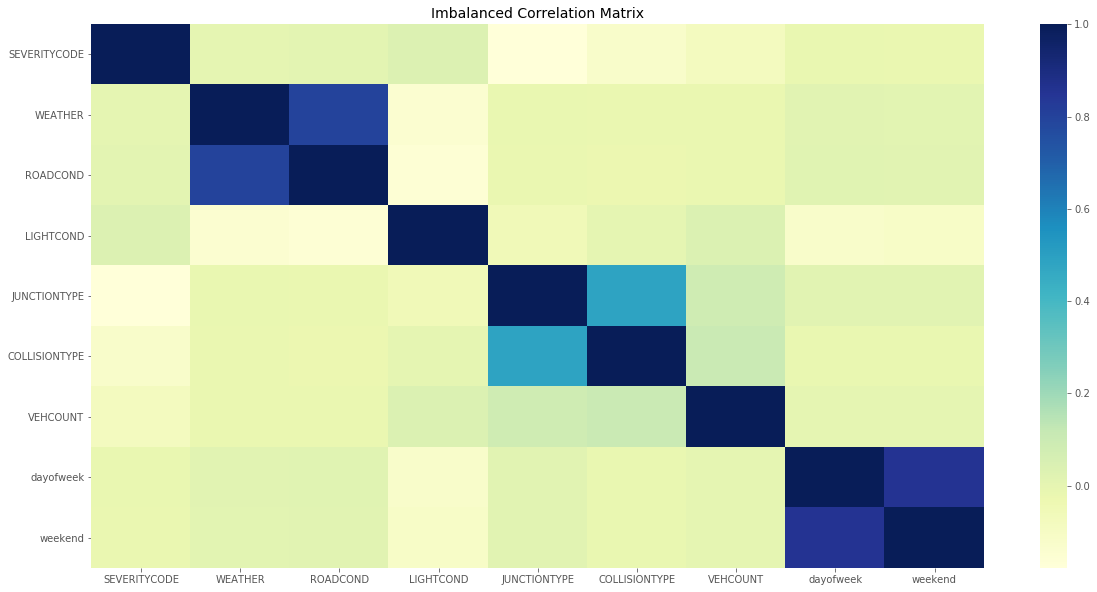

In [32]:
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [33]:
# Sample balance
print(df['SEVERITYCODE'].value_counts())
from sklearn.utils import resample
df_maj = df[df.SEVERITYCODE == 1]
df_min = df[df.SEVERITYCODE == 2]
df_maj_dsample = resample(df_maj,
                          replace = False,
                          n_samples = 55515,
                          random_state = 123)
balanced_df = pd.concat([df_maj_dsample, df_min]).reset_index(drop = True)
print(balanced_df.count())
print(balanced_df['SEVERITYCODE'].value_counts())
balanced_df

1    112477
2     55503
Name: SEVERITYCODE, dtype: int64
SEVERITYCODE     111018
WEATHER          111018
ROADCOND         111018
LIGHTCOND        111018
JUNCTIONTYPE     111018
COLLISIONTYPE    111018
VEHCOUNT         111018
dayofweek        111018
weekend          111018
dtype: int64
1    55515
2    55503
Name: SEVERITYCODE, dtype: int64


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,dayofweek,weekend
0,1,1,0,5,1,0,2,4,1
1,1,1,0,1,4,5,3,3,0
2,1,1,0,5,4,5,2,1,0
3,1,6,7,2,3,4,1,0,0
4,1,1,0,5,4,0,2,3,0
...,...,...,...,...,...,...,...,...,...
111013,2,6,7,5,4,0,2,2,0
111014,2,1,7,5,4,0,2,4,1
111015,2,1,0,5,4,2,2,0,0
111016,2,1,0,5,1,3,2,5,1


## Catergorized variables conversion to numerical variables

In [37]:
#Convert catergorized variables to numerical variables
Feature = balanced_df[['WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','COLLISIONTYPE','VEHCOUNT','weekend']]
from sklearn.preprocessing import LabelEncoder
Fea = LabelEncoder()
balanced_df['WEATHER'] = Fea.fit_transform(balanced_df['WEATHER'])
balanced_df['ROADCOND'] = Fea.fit_transform(balanced_df['ROADCOND'])
balanced_df['LIGHTCOND'] = Fea.fit_transform(balanced_df['LIGHTCOND'])
balanced_df['JUNCTIONTYPE'] = Fea.fit_transform(balanced_df['JUNCTIONTYPE'])
balanced_df['COLLISIONTYPE'] = Fea.fit_transform(balanced_df['COLLISIONTYPE'])
balanced_df
Feature

,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,COLLISIONTYPE,VEHCOUNT,weekend
0,1,0,5,1,0,2,1
1,1,0,1,4,5,3,0
2,1,0,5,4,5,2,0
3,6,7,2,3,4,1,0
4,1,0,5,4,0,2,0
...,...,...,...,...,...,...,...
111013,6,7,5,4,0,2,0
111014,1,7,5,4,0,2,1
111015,1,0,5,4,2,2,0
111016,1,0,5,1,3,2,1


## Data Standardization

In [38]:
## DATA standardization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)
y = balanced_df['SEVERITYCODE'].values
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

[[-0.7102158  -0.6257907   0.5938161  ... -1.47539382  0.07226847
   1.18366553]
 [-0.7102158  -0.6257907  -2.20349691 ...  0.23650612  1.6970358
  -0.84483325]
 [-0.7102158  -0.6257907   0.5938161  ...  0.23650612  0.07226847
  -0.84483325]
 ...
 [-0.7102158  -0.6257907   0.5938161  ... -0.79063385  0.07226847
  -0.84483325]
 [-0.7102158  -0.6257907   0.5938161  ... -0.44825386  0.07226847
   1.18366553]
 [-0.7102158  -0.6257907   1.29314435 ... -1.13301383 -1.55249886
  -0.84483325]]
[1 1 1 ... 2 2 2]


## Data modeling

In [39]:
# 1. K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier as knn
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
ks = 20
mean_accuracy = np.zeros((ks-1))
std_accuracy = np.zeros((ks-1))
for n in range(1, ks):
    knn_model = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    #mean_accuracy.append(accuracy_score(y_test, knn_yhat))
    std_accuracy[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

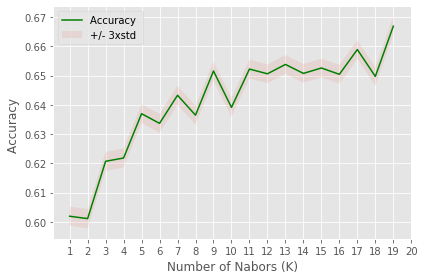

The best accuracy of KNN model was 0.667 with k= 19
jaccard_KNN:  0.67
f1_KNN:  0.64


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [40]:
#KNN model evaluation
mean_accuracy
plt.plot(range(1,ks),mean_accuracy,'g')
plt.fill_between(range(1,ks),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.xticks(range(1,21,1))
plt.tight_layout()
plt.show()
print("The best accuracy of KNN model was", round(mean_accuracy.max(),3), "with k=", mean_accuracy.argmax()+1)
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
knn_model2 = knn(n_neighbors = 19)
knn_model2.fit(X_train, y_train)
knn_yhat2 = knn_model2.predict(X_test)
jaccard_KNN = jaccard_similarity_score(y_test, knn_yhat2)
F1_KNN = f1_score(y_test, knn_yhat2)
print('jaccard_KNN: ', round(jaccard_KNN,2))
print('f1_KNN: ', round(F1_KNN,2))

/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/

d = 1 has a Score = 0.5749414519906323 
d = 2 has a Score = 0.622995856602414 
d = 3 has a Score = 0.6338497568005764 
d = 4 has a Score = 0.6796523148982165 
d = 5 has a Score = 0.682759863087732 
d = 6 has a Score = 0.6830300846694289 
d = 7 has a Score = 0.6837957124842371 
d = 8 has a Score = 0.6829850477391461 
d = 9 has a Score = 0.6822644568546208 


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Text(0, 0.5, 'accuracy')

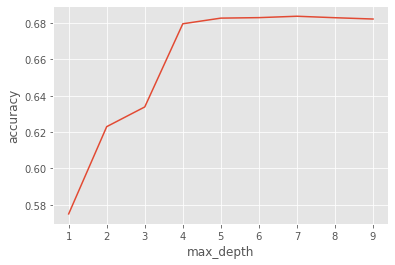

In [41]:
# 2. Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
depth_range = range(1,10)
mean_accuracy2 = []
f1_score_ = []
jaccard_similarity_score1 = []
for d in depth_range:
    Tree_model = DecisionTreeClassifier(criterion = 'gini',max_depth = d)
    Tree_model.fit(X_train, y_train)
    Tree_yhat = Tree_model.predict(X_test)
    mean_accuracy2.append(accuracy_score(y_test, Tree_yhat))
    jaccard_similarity_score1.append(jaccard_similarity_score(y_test, Tree_yhat))
    f1_score_.append(f1_score(y_test, Tree_yhat, average = 'weighted'))
for i in range(0, len(mean_accuracy2)):
    print("d = {} has a Score = {} ".format(i+1, mean_accuracy2[i]))
    
plt.plot(depth_range, mean_accuracy2)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
#print("The best accuracy of Decision tree model was", round(mean_accuracy2.max(),3), "with d=", mean_accuracy2.argmax()+1)


In [42]:
# Decision tree Jaccard & F1 score
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_similarity_score
result = pd.DataFrame([jaccard_similarity_score1, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result


Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.574941,0.622996,0.633850,0.679652,0.682760,0.683030,0.683796,0.682985,0.682264
F1,0.525543,0.622863,0.630607,0.678219,0.679801,0.679943,0.681185,0.680003,0.679426


In [43]:
#support vector machine
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC 
from sklearn.metrics import jaccard_similarity_score
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score3 = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score3.append(f1_score(y_test, svc_yhat, average = 'weighted'))
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
svm_yhat = clf.predict(X_test)
print('Accuracy of SVM model is: ', round(metrics.accuracy_score(y_test, svm_yhat), 3))

Accuracy of SVM model is:  0.662


Text(0, 0.5, 'Accuracy')

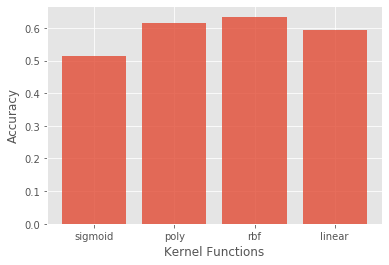

In [44]:
y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score3, align='center', alpha = 0.8)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [45]:
# svm jaccard & f1 score
svc_model2 = SVC(C = 0.01, gamma = 'auto', kernel = 'rbf')
svc_model2.fit(X_train, y_train)
svc_yhat2 = svc_model.predict(X_test)
jaccard_svm = jaccard_similarity_score(y_test, svc_yhat2)
F1_svm = f1_score(y_test, svc_yhat2)
print('jaccard_SVM: ', round(jaccard_svm,2))
print('f1_SVM: ', round(F1_svm,2))

jaccard_SVM:  0.59
f1_SVM:  0.61


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [46]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import log_loss
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score_3 = []
jaccard_LR = []
f1_LR = []
logloss_LR = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}, jaccard_LR: {}, f1_LR: {}, logloss_LR: {}'.format(iterations, c, solver, round(accuracy_score(y_test, lr_yhat),2), \
        round(jaccard_similarity_score(y_test, lr_yhat),2), round(f1_score(y_test, lr_yhat),2), round(log_loss(y_test, y_prob),2)))
        accuracy_score_3.append(accuracy_score(y_test, lr_yhat))
                              
    print('\n')
    
#logiloan = LogisticRegression(C= 0.01, solver = 'liblinear').fit(X_train,y_train)
#log_yhat = logiloan.predict(X_test)
lr_yhat
#print('Accuracy of LR model: ', round(metrics.accuracy_score(y_test, lr_yhat),3))
#print("The best accuracy of LogisticRegression model was", round(accuracy_score_3.max(),3), "with C=", accuracy_score_3.argmax()+1)

/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67


/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Test 14: Accuracy at C = 0.001 when Solver = newton-cg is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67
Test 15: Accuracy at C = 0.001 when Solver = sag is : 0.6, jaccard_LR: 0.6, f1_LR: 0.61, logloss_LR: 0.67




/Users/new/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


array([2, 1, 2, ..., 2, 2, 1])

In [ ]:
from pandas import DataFrame
df_accuracy_score_3_1 = DataFrame(accuracy_score_3[0:5],columns=['0.1']).transpose()
df_accuracy_score_3_2 = DataFrame(accuracy_score_3[5:10],columns=['0.01']).transpose()
df_accuracy_score_3_3 = DataFrame(accuracy_score_3[10:15],columns=['0.01']).transpose()
df_accuracy_score_3_4 = df_accuracy_score_3_1.append(df_accuracy_score_3_2)
df_accuracy_score_3 = df_accuracy_score_3_4.append(df_accuracy_score_3_3)
df_accuracy_score_3
df_accuracy_score_3.columns=['lbfgs','saga','liblinear','newton-cg','sag']
df_accuracy_score_3

In [ ]:
df_accuracy_score_3.plot(kind='bar', figsize = (10,5))
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend()

## Model performance summary

|Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.67    |0.64      | NA      |
| Decision Tree      | 0.68    |0.68      | NA      |
| SVM                | 0.59    |0.61      | NA      |
| LogisticRegression | 0.60    |0.61      | 0.67    |